# Problem 2: Table Compilation and Plotting

This notebook combines:
1. **Part 1**: Table compilation (Table 2 and Table 3) for VGG11, VGG16, and mobilenet
2. **Part 2**: Plotting power consumption and temperature comparisons

## Part 1: Table Compilation

Compile Table 2 (Inference time, RAM memory, Accuracy) and Table 3 (Energy consumption) from deployment results.

In [21]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [22]:
# Configuration
results_dir = './'  # Change this to your results directory path
models = ['vgg11', 'vgg16', 'mobilenet']  # Added mobilenet
devices = ['mc1', 'raspi']

In [23]:
def read_summary_metrics(csv_path):
    """
    Read summary metrics from CSV file
    Returns a dictionary of metric: value pairs
    """
    metrics = {}
    try:
        df = pd.read_csv(csv_path)
        for _, row in df.iterrows():
            metrics[row['Metric']] = row['Value']
    except Exception as e:
        print(f"Error reading {csv_path}: {e}")
    return metrics

In [24]:
def compile_table2(results_dir, models, devices):
    """
    Compile Table 2: Inference time, RAM memory, and Accuracy
    
    Expected directory structure:
    results_dir/
        mc1/
            vgg11_summary_metrics.csv
            vgg16_summary_metrics.csv
            mobilenet_summary_metrics.csv
        raspi/
            vgg11_summary_metrics.csv
            vgg16_summary_metrics.csv
            mobilenet_summary_metrics.csv
    """
    print("="*80)
    print("TABLE 2: Deployment Metrics")
    print("="*80)
    
    # Create data structure for table
    table_data = {
        'Model': [],
        'MC1 Total Inference Time (s)': [],
        'RaspberryPi Total Inference Time (s)': [],
        'MC1 RAM Memory (MB)': [],
        'RaspberryPi RAM Memory (MB)': [],
        'MC1 Accuracy (%)': [],
        'RaspberryPi Accuracy (%)': []
    }
    
    for model in models:
        table_data['Model'].append(model.upper())
        
        for device in devices:
            csv_path = os.path.join(results_dir, device, f'{model}_summary_metrics.csv')
            
            if os.path.exists(csv_path):
                metrics = read_summary_metrics(csv_path)
                
                # Extract metrics
                inference_time = metrics.get('Total Inference Time (s)', 'N/A')
                ram_memory = metrics.get('Peak RAM Memory (MB)', 'N/A')
                accuracy = metrics.get('Test Accuracy (%)', 'N/A')
                
            else:
                print(f"Warning: {csv_path} not found")
                inference_time = 'N/A'
                ram_memory = 'N/A'
                accuracy = 'N/A'
            
            if device == 'mc1':
                table_data['MC1 Total Inference Time (s)'].append(inference_time)
                table_data['MC1 RAM Memory (MB)'].append(ram_memory)
                table_data['MC1 Accuracy (%)'].append(accuracy)
            else:
                table_data['RaspberryPi Total Inference Time (s)'].append(inference_time)
                table_data['RaspberryPi RAM Memory (MB)'].append(ram_memory)
                table_data['RaspberryPi Accuracy (%)'].append(accuracy)
    
    # Create DataFrame and display
    df = pd.DataFrame(table_data)
    print("\n", df.to_string(index=False))
    
    # Save to CSV
    output_file = os.path.join(results_dir, 'table2_compiled.csv')
    df.to_csv(output_file, index=False)
    print(f"\nTable 2 saved to: {output_file}")
    
    return df

In [25]:
def compile_table3(results_dir, models, devices):
    """
    Compile Table 3: Total energy consumption
    
    Expected directory structure:
    results_dir/
        mc1/
            vgg11_summary_metrics.csv
            vgg16_summary_metrics.csv
            mobilenet_summary_metrics.csv
        raspi/
            vgg11_summary_metrics.csv
            vgg16_summary_metrics.csv
            mobilenet_summary_metrics.csv
    """
    print("\n" + "="*80)
    print("TABLE 3: Energy Consumption")
    print("="*80)
    
    # Create data structure for table
    table_data = {
        'Model': [],
        'MC1 Total Energy (J)': [],
        'RaspberryPi Total Energy (J)': []
    }
    
    for model in models:
        table_data['Model'].append(model.upper())
        
        for device in devices:
            csv_path = os.path.join(results_dir, device, f'{model}_summary_metrics.csv')
            
            if os.path.exists(csv_path):
                metrics = read_summary_metrics(csv_path)
                energy = metrics.get('Total Energy (J)', 'N/A')
            else:
                print(f"Warning: {csv_path} not found")
                energy = 'N/A'
            
            if device == 'mc1':
                table_data['MC1 Total Energy (J)'].append(energy)
            else:
                table_data['RaspberryPi Total Energy (J)'].append(energy)
    
    # Create DataFrame and display
    df = pd.DataFrame(table_data)
    print("\n", df.to_string(index=False))
    
    # Save to CSV
    output_file = os.path.join(results_dir, 'table3_compiled.csv')
    df.to_csv(output_file, index=False)
    print(f"\nTable 3 saved to: {output_file}")
    
    return df

In [26]:
def generate_comparison_stats(results_dir, models, devices):
    """
    Generate additional comparison statistics
    """
    print("\n" + "="*80)
    print("ADDITIONAL COMPARISON STATISTICS")
    print("="*80)
    
    for model in models:
        print(f"\n{model.upper()} Comparison:")
        print("-" * 40)
        
        for device in devices:
            csv_path = os.path.join(results_dir, device, f'{model}_summary_metrics.csv')
            
            if os.path.exists(csv_path):
                metrics = read_summary_metrics(csv_path)
                
                device_name = "Odroid MC1" if device == 'mc1' else "RaspberryPi 3B+"
                print(f"\n{device_name}:")
                
                # Calculate additional metrics
                total_time = float(metrics.get('Total Inference Time (s)', 0))
                total_images = int(metrics.get('Total Images', 0))
                total_energy = float(metrics.get('Total Energy (J)', 0))
                avg_power = float(metrics.get('Average Power (W)', 0))
                
                if total_images > 0:
                    time_per_image = total_time / total_images * 1000  # ms
                    energy_per_image = total_energy / total_images  # J
                    print(f"  Average time per image: {time_per_image:.2f} ms")
                    print(f"  Average energy per image: {energy_per_image:.4f} J")
                    print(f"  Average power consumption: {avg_power:.4f} W")
                    
                    # Throughput
                    throughput = total_images / total_time if total_time > 0 else 0
                    print(f"  Throughput: {throughput:.2f} images/second")

### Execute Table Compilation

In [27]:
# Compile Table 2
table2_df = compile_table2(results_dir, models, devices)

TABLE 2: Deployment Metrics

     Model MC1 Total Inference Time (s) RaspberryPi Total Inference Time (s) MC1 RAM Memory (MB) RaspberryPi RAM Memory (MB) MC1 Accuracy (%) RaspberryPi Accuracy (%)
    VGG11                       771.48                              1289.28              331.00                      166.00            76.10                    76.10
    VGG16                      1115.73                              1801.56              355.00                      185.00            78.47                    78.47
MOBILENET                       542.76                              1018.98              301.00                      131.00            78.49                    78.49

Table 2 saved to: ./table2_compiled.csv


In [28]:
# Compile Table 3
table3_df = compile_table3(results_dir, models, devices)


TABLE 3: Energy Consumption

     Model MC1 Total Energy (J) RaspberryPi Total Energy (J)
    VGG11            5911.8795                    7799.9015
    VGG16            9698.1863                   10698.0575
MOBILENET            3600.3522                    6022.7317

Table 3 saved to: ./table3_compiled.csv


In [29]:
# Generate additional comparison statistics (optional)
generate_comparison_stats(results_dir, models, devices)


ADDITIONAL COMPARISON STATISTICS

VGG11 Comparison:
----------------------------------------

Odroid MC1:
  Average time per image: 77.15 ms
  Average energy per image: 0.5912 J
  Average power consumption: 7.6630 W
  Throughput: 12.96 images/second

RaspberryPi 3B+:
  Average time per image: 128.93 ms
  Average energy per image: 0.7800 J
  Average power consumption: 6.0498 W
  Throughput: 7.76 images/second

VGG16 Comparison:
----------------------------------------

Odroid MC1:
  Average time per image: 111.57 ms
  Average energy per image: 0.9698 J
  Average power consumption: 8.6922 W
  Throughput: 8.96 images/second

RaspberryPi 3B+:
  Average time per image: 180.16 ms
  Average energy per image: 1.0698 J
  Average power consumption: 5.9382 W
  Throughput: 5.55 images/second

MOBILENET Comparison:
----------------------------------------

Odroid MC1:
  Average time per image: 54.28 ms
  Average energy per image: 0.3600 J
  Average power consumption: 6.6335 W
  Throughput: 18.42 i

## Part 2: Plotting Results

Generate plots for power consumption and temperature over time for both devices.

In [30]:
# Configuration for plotting
model_to_plot = 'vgg11'  # Change to 'vgg16' or 'mobilenet' as needed
mc1_timeseries_file = os.path.join(results_dir, 'mc1', f'{model_to_plot}_timeseries_data.csv')
raspi_timeseries_file = os.path.join(results_dir, 'raspi', f'{model_to_plot}_timeseries_data.csv')
output_plot_dir = results_dir

In [31]:
def plot_power_consumption(mc1_data, raspi_data, model_name, output_dir='./'):
    """
    Plot power consumption over time for both MC1 and RaspberryPi
    
    Args:
        mc1_data: DataFrame with MC1 time-series data
        raspi_data: DataFrame with RaspberryPi time-series data
        model_name: Name of the model being plotted
        output_dir: Directory to save the plot
    """
    plt.figure(figsize=(12, 6))
    
    plt.plot(mc1_data['Timestamp (s)'], mc1_data['Power (W)'], 
             label='Odroid MC1', linewidth=2, alpha=0.7)
    plt.plot(raspi_data['Timestamp (s)'], raspi_data['Power (W)'], 
             label='RaspberryPi 3B+', linewidth=2, alpha=0.7)
    
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Power (W)', fontsize=12)
    plt.title(f'Power Consumption Over Time - {model_name.upper()} Model', 
              fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    output_file = os.path.join(output_dir, f'{model_name}_power_consumption_comparison.png')
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"Power consumption plot saved to: {output_file}")
    plt.show()

In [32]:
def plot_temperature(mc1_data, raspi_data, model_name, output_dir='./'):
    """
    Plot CPU temperature over time for both MC1 and RaspberryPi
    
    Args:
        mc1_data: DataFrame with MC1 time-series data
        raspi_data: DataFrame with RaspberryPi time-series data
        model_name: Name of the model being plotted
        output_dir: Directory to save the plot
    """
    plt.figure(figsize=(12, 6))
    
    plt.plot(mc1_data['Timestamp (s)'], mc1_data['Temperature (°C)'], 
             label='Odroid MC1', linewidth=2, alpha=0.7)
    plt.plot(raspi_data['Timestamp (s)'], raspi_data['Temperature (°C)'], 
             label='RaspberryPi 3B+', linewidth=2, alpha=0.7)
    
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Temperature (°C)', fontsize=12)
    plt.title(f'CPU Temperature Over Time - {model_name.upper()} Model', 
              fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    output_file = os.path.join(output_dir, f'{model_name}_temperature_comparison.png')
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"Temperature plot saved to: {output_file}")
    plt.show()

### Load Time-Series Data and Generate Plots

In [33]:
# Load time-series data
print(f"Loading MC1 data from: {mc1_timeseries_file}")
mc1_df = pd.read_csv(mc1_timeseries_file)

print(f"Loading RaspberryPi data from: {raspi_timeseries_file}")
raspi_df = pd.read_csv(raspi_timeseries_file)

print(f"\nData loaded successfully for {model_to_plot.upper()}")

Loading MC1 data from: ./mc1\vgg11_timeseries_data.csv
Loading RaspberryPi data from: ./raspi\vgg11_timeseries_data.csv

Data loaded successfully for VGG11



Generating power consumption plot...
Power consumption plot saved to: ./vgg11_power_consumption_comparison.png


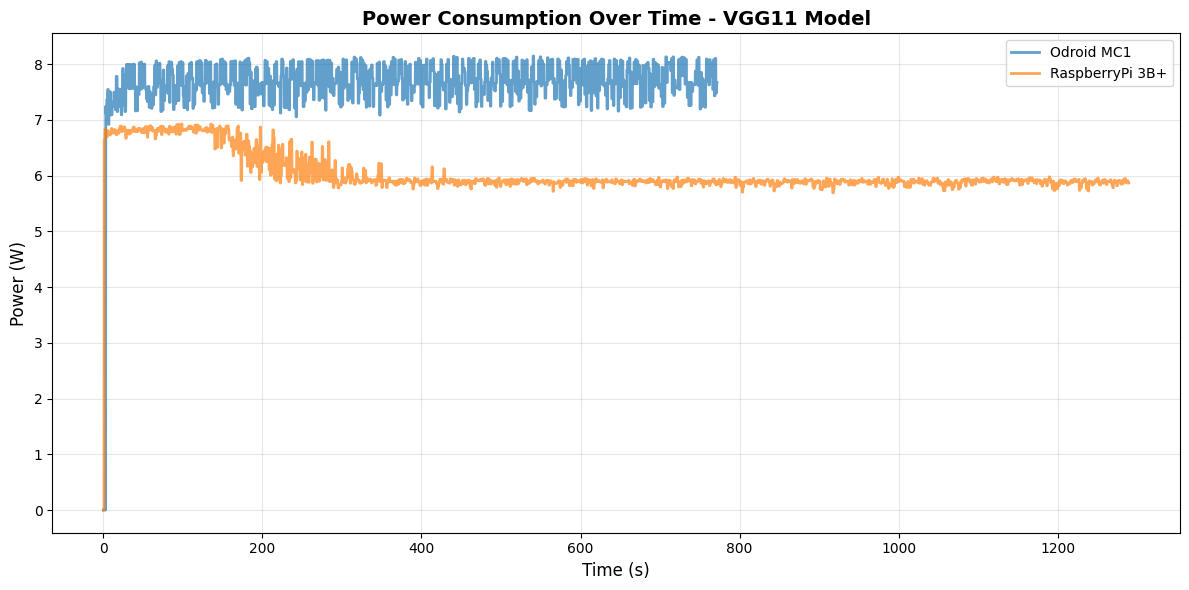

In [34]:
# Generate power consumption plot
print("\nGenerating power consumption plot...")
plot_power_consumption(mc1_df, raspi_df, model_to_plot, output_plot_dir)


Generating temperature plot...
Temperature plot saved to: ./vgg11_temperature_comparison.png


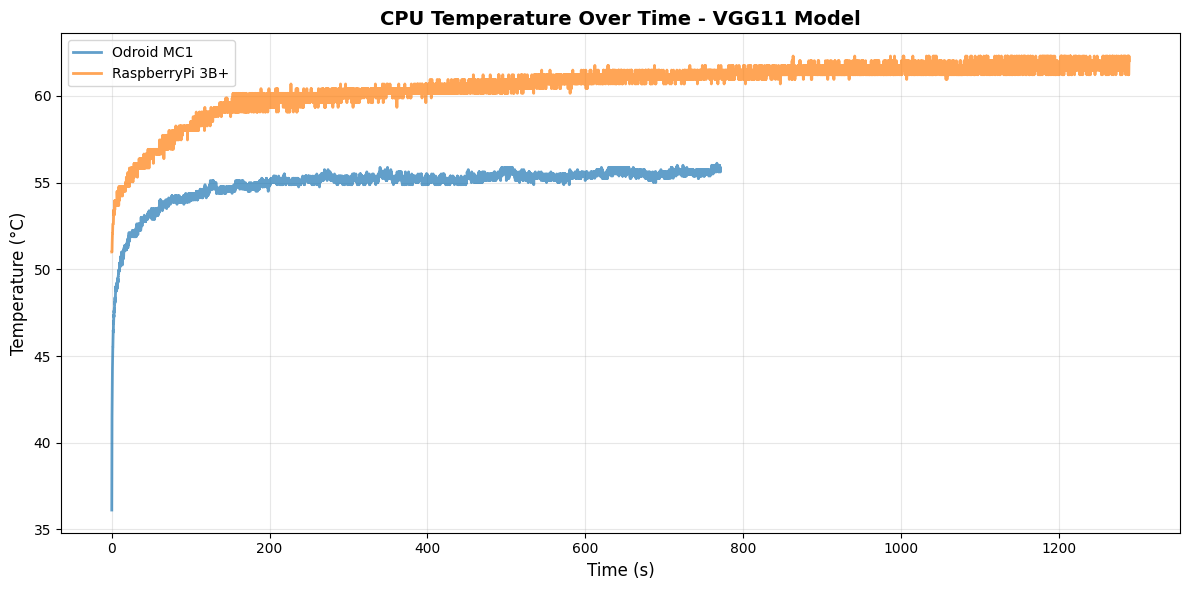

In [35]:
# Generate temperature plot
print("\nGenerating temperature plot...")
plot_temperature(mc1_df, raspi_df, model_to_plot, output_plot_dir)

Problem 2 Question 3:

Based on only the VG11 and VG16 models for the RaspberryPi and the MC1, the MC1 is best for inference. This is because while RaspberryPi takes up half the memory space, its inference time and total energy used is a great amount larger. The total inference time for MC1 was 771.48s while the RaspberryPi took 1289.28s for the VG11. The large difference between the inference times also resulted in the RaspberryPi using more energy overall even though the power consumption rate for the MC1 is higher than the Pi.